# Variable types

The original data source can be found [here](http://archive.ics.uci.edu/dataset/222/bank+marketing)

I've modified the data for the course and uploaded it to the repo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../bank-marketing.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribe
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0,unknown,0
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0,unknown,0
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,NaN,-1.0,0,unknown,0
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0,unknown,0
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0,unknown,0


# Are there categorical variables?

In [3]:
# Tip: there is more than 1 way to obtain this list
# If you did it differently, well done.

cat_vars = [c for c in data.columns if data[c].dtypes=="O"]
cat_vars

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [4]:
data[cat_vars]

,job,marital,education,default,housing,loan,contact,month,poutcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,no,unknown,may,unknown
...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown
45208,retired,married,secondary,no,no,no,cellular,nov,success
45209,blue-collar,married,secondary,no,no,no,NaN,nov,unknown


# Are they ordinal or nominal?

In [5]:
for var in cat_vars:
    print(var, data[var].unique(), "\n")

job ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student' nan] 

marital ['married' 'single' 'divorced'] 

education ['tertiary' 'secondary' 'unknown' 'primary'] 

default ['no' 'yes'] 

housing ['yes' 'no'] 

loan ['no' 'yes'] 

contact ['unknown' nan 'cellular' 'telephone'] 

month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'] 

poutcome ['unknown' nan 'failure' 'other' 'success'] 



Education and month are ordinal. The rest seem to be nominal.

# Are the numerical variables continuous, discrete or binary?

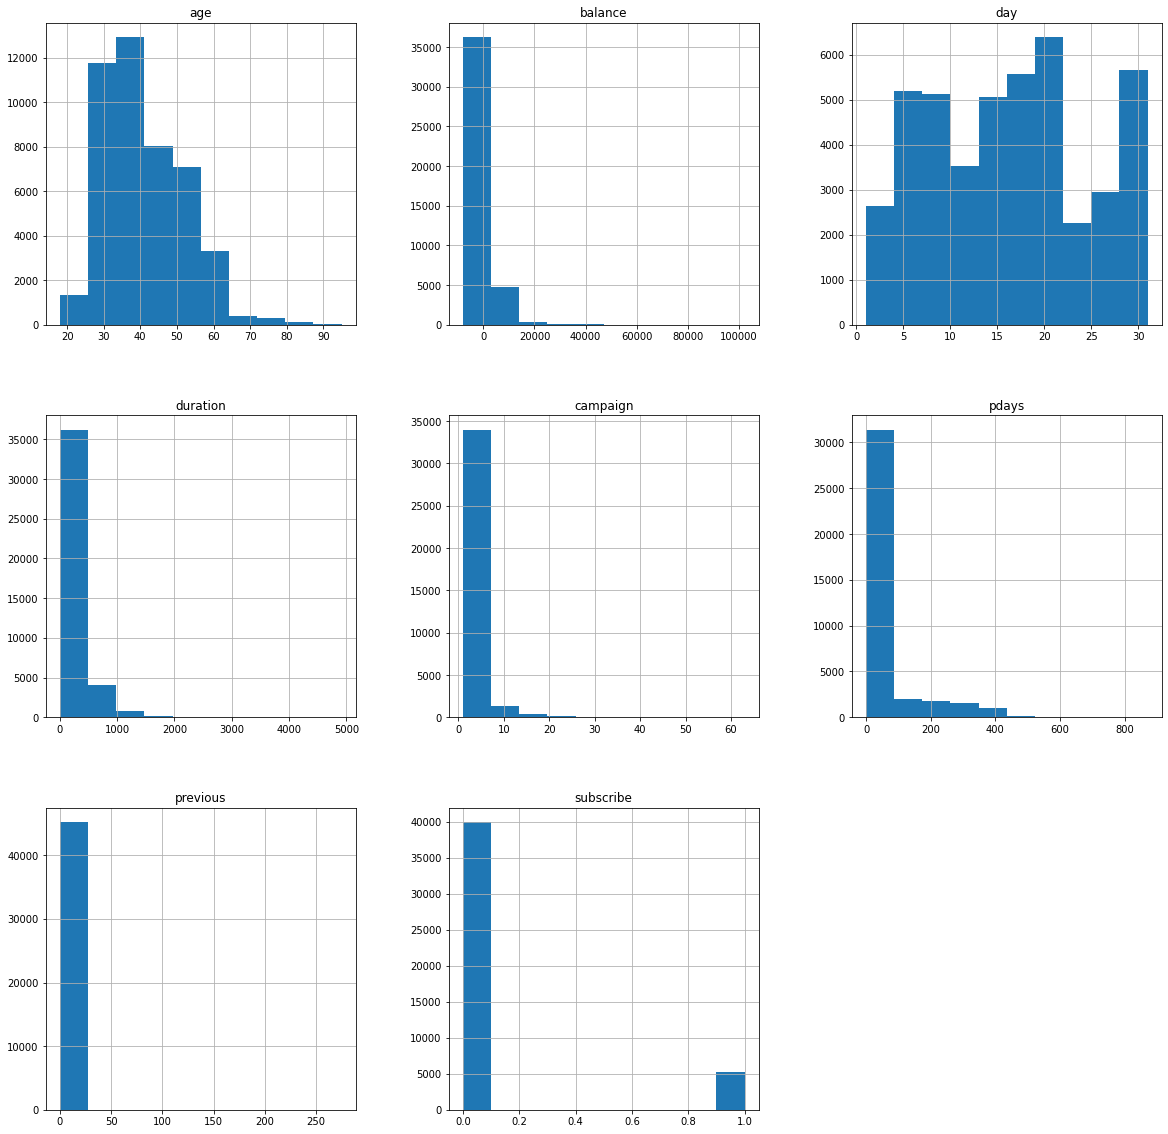

In [6]:
data.hist(figsize=(20,20))
plt.show()

In [7]:
num_vars = [c for c in data.columns if c not in cat_vars]

for var in num_vars:
    print(var, data[var].unique(), "\n")


age [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88] 

balance [2.1430e+03 2.9000e+01 2.0000e+00 ... 8.2050e+03 1.4204e+04 1.6353e+04] 

day [ 5. nan  6.  7.  8.  9. 12. 13. 14. 15. 16. 19. 20. 21. 23. 26. 27. 28.
 29. 30.  2.  3.  4. 11. 17. 18. 24. 25.  1. 10. 22. 31.] 

duration [ 261.  151.   76. ... 1298. 1246. 1556.] 

campaign [ 1. nan  2.  3.  5.  4.  6.  8.  7.  9. 12. 10. 13. 11. 19. 14. 24. 16.
 18. 22. 32. 17. 25. 43. 51. 63. 41. 26. 15. 55. 50. 38. 23. 21. 28. 20.
 31. 37. 29. 30. 46. 58. 27. 33. 35. 34. 36. 39. 44.] 

pdays [ -1.  nan 151. 166.  91. 147. 176. 174. 170. 167. 195. 129. 188. 196.
 172. 118. 119. 117. 164. 132. 131. 123. 159. 186. 111. 115. 116. 173.
 178. 152.  96. 103. 150. 175. 110. 104. 181. 165. 185. 154. 145. 171.
 126. 193. 180. 109. 101. 158. 168.  97. 182. 127. 194. 

In [8]:
data["day"].unique()

array([ 5., nan,  6.,  7.,  8.,  9., 12., 13., 14., 15., 16., 19., 20.,
       21., 23., 26., 27., 28., 29., 30.,  2.,  3.,  4., 11., 17., 18.,
       24., 25.,  1., 10., 22., 31.])

In [9]:
data["subscribe"].unique()

array([0, 1], dtype=int64)

Subscribe is binary, and day is discrete. I'd argue that we can consider the rest of the variables continuous.

# Which other types of variables that we saw in the course, are not present in this dataset?

Datetime variables and mixed variables.